# **WHAT IS PARKINSON'S?**

**Parkinson’s** disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness.
It has 5 stages to it and affects more than 1 million individuals every year in India.
This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

**SYMPTOMS:**
**Tremor**: A tremor, or shaking, usually begins in a limb, often your hand or fingers. You may rub your thumb and forefinger back and forth, known as a pill-rolling tremor. Your hand may tremble when it's at rest.

**Slowed movement (bradykinesia)**: Over time, Parkinson's disease may slow your movement, making simple tasks difficult and time-consuming. Your steps may become shorter when you walk. It may be difficult to get out of a chair. You may drag your feet as you try to walk.

***Speech changes***: You may speak softly, quickly, slur or hesitate before talking. Your speech may be more of a monotone rather than have the usual inflections.

# ENSEMBLE LEARNING ALGORITHMS USED IN THIS ANALYSIS:
 *XGBOOST

 *ADABOOST

# **CLASSIFICATION ALGORITHMS USED IN THIS ANALYSIS: **


*LOGISTIC REGRESSION

*NAIVE BAYES

*DECISION TREE

*SUPPORT VECTOR MACHINE

*K-NEAREST NEIGHBOUR(KNN)

# **IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **LOADING THE DATASET**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# **EXPLORING THE DATASET**

In [ ]:
# Displays the total number of rows and columns present in the dataset
df.shape

(195, 24)

In [ ]:
# Displaying the name of the features present in the dataset
df.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# Displaying the first few rows of the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Displaying the last last few rows of the dataset
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
# Finding the null values in the dataset and summing them up
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Displaying the duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
# Displaying the datatype of the features in the dataset.
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# **EXPLORATORY DATA ANALYSIS**





In [ ]:
# Finding correlation
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


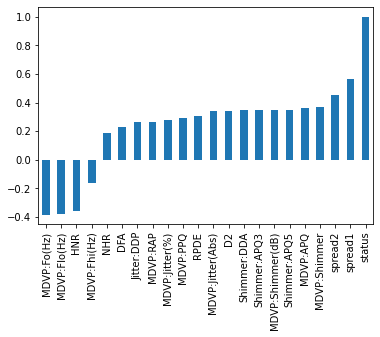

In [ ]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

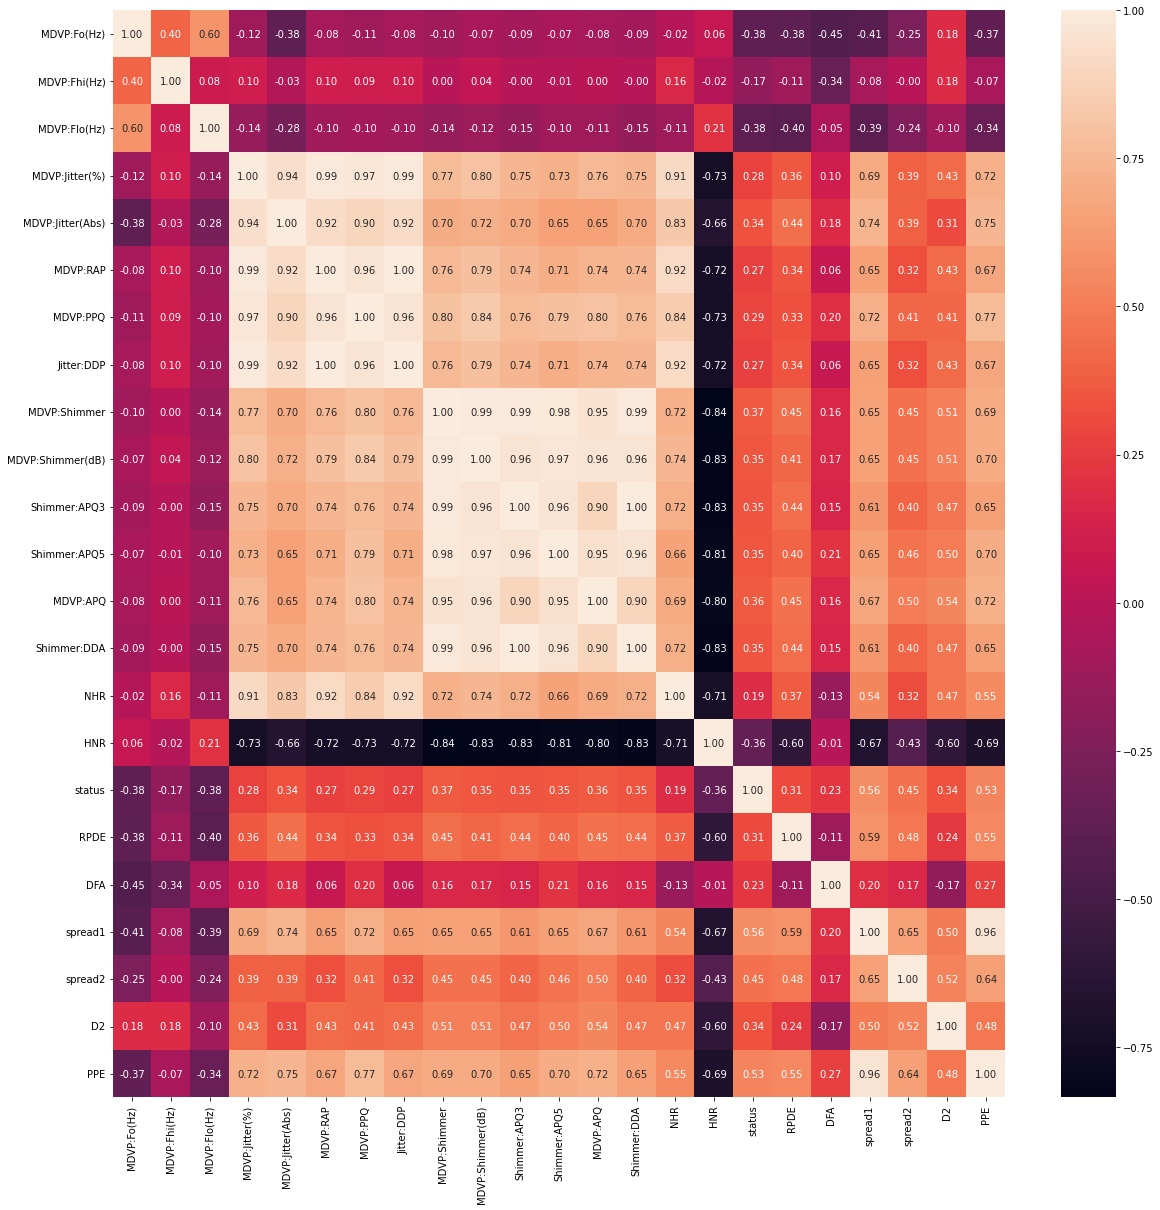

In [ ]:
# annot – an array of the same shape as data which is used to annotate the heatmap.
# fmt – string formatting code to use when adding annotations.
# Subplots mean groups of axes that can exist in a single matplotlib figure.
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot = True,fmt= '.2f')
plt.show()

**Our target variable here is 'status' column, 0 --> Without Parkison Disease, 1 --> Has Parkinson Disease**



The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [ ]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values


**Checking the count of the labels "0" and "1" in the target variable. **

In [ ]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


**We have 147 ones and 48 zeros in the status column in our dataset.**



Why should we normalize data?

Because different features do not have similar ranges of values and hence gradients may end up taking a long time and can oscillate back and forth and take a long time before it can finally find its way to the global/local minimum. To overcome the model learning problem, we normalize the data.

**Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range**.

**The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.**

In [ ]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels


**Now, split the dataset into training and testing set in the ratio 80/20**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 7)

# **BUILDING THE XGBOOST MODEL**

initialize a XGBClassifier and train the model.XGboost-eXtreme Gradient boosting - It falls under the category of ensemble learning in ML, where we train and predict using many models to produce one superior output.(XGboost does not take categorical variables as input.)


In [ ]:
#training the model on the train set
#The learning rate is the shrinkage you do at every step you are making. If you make 1 step at eta = 1.00, the step weight is 1.00.
#The max_depth parameter specifies the maximum depth of each tree.
#scale_pos_weight is the ratio of number of negative class to the positive class. Suppose, the dataset has 90 observations of negative class
#and 10 observations of positive class, then ideal value of scale_pos_weight should be 9.
PML = XGBClassifier(learning_rate=0.1, max_depth=10)
PML.fit(x_train,y_train)

XGBClassifier(eval_metric='mlogloss', max_depth=10, scale_pos_weight=1.5)

In [ ]:
#predicting the test set results
y_pred = PML.predict(x_test)

In [ ]:
#finding the accuracy score of the model
print(accuracy_score (y_pred,y_test)*100)



92.3076923076923


[[ 5  2]
 [ 1 31]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


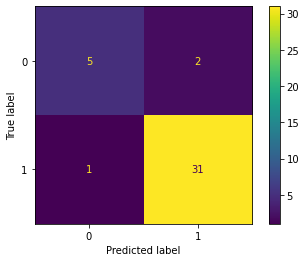

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(PML,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.97      0.94      0.95        33

    accuracy                           0.92        39
   macro avg       0.84      0.89      0.86        39
weighted avg       0.93      0.92      0.93        39



In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

88.63636363636364

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


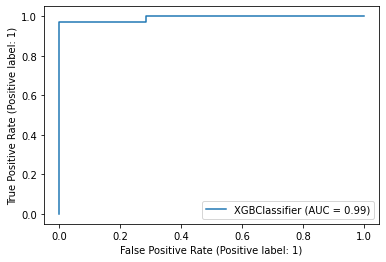

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(PML,x_test,y_test)
plt.show()

In [ ]:
#prediction using custom values
#random values are taken for this prediction
new=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,
1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,0.9888,0.78654]]


In [ ]:
#In this step, we use our model to predict the output based on new values
output=PML.predict(new)
output

array([1])

In [ ]:
#label 1 means true
#label 0 means false
if output==1:
  print(True)
if output==0:
  print(False)

True


# **ADABOOST**


AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification.

AdaBoost is short for Adaptive Boosting and is a very popular boosting technique that combines multiple “weak classifiers” into a single “strong classifier”

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Random forest classifier creates a set of decision trees from randomly selected subset of training set.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#defining the model
# base_estimator: The model to the ensemble, the default is a decision tree.
# n_estimators: Number of models to be built.
# learning_rate: shrinks the contribution of each classifier by this value.
# random_state: The random number seed, so that the same random numbers generated every time.
model1 = AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),
                            n_estimators=100,learning_rate=0.01)


In [ ]:
model1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100, random_state=96)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
print(model1.score(x_test,y_test)*100)

92.3076923076923


# **LOGISTIC REGRESSION**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

 It is used for predicting the categorical dependent variable using a given set of independent variables.


Logistic regression predicts the output of a categorical dependent variable.

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
lr=logistic.fit(x_train, y_train)
lr.intercept_
lr.coef_
lr1=lr.predict_proba(x)
lr.score(x,y)

In [ ]:
y_pred = logistic.predict(x_test)

In [ ]:
print(logistic.score(x_test,y_test)*100)

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(logistic,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(logistic,x_test,y_test)
plt.show()

# **Naïve Bayes**


Naïve Bayes algorithm is a supervised learning algorithm,
which is based on Bayes theorem and used for solving classification problems.

In [ ]:
#defining the model
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

In [ ]:
#predicting using the test set
y_pred  =  NB.predict(x_test)


In [ ]:
print(NB.score(x_test,y_test)*100)

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(NB,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(NB,x_test,y_test)
plt.show()

# **Decision Tree**

**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression.

 The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

 A tree can be seen as a piecewise constant approximation.

** DecisionTreeClassifier** is a class capable of performing multi-class classification on a dataset.

In [ ]:
#importing DecisionTreeClassifier from sklearn
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)

In [ ]:
#predicting the test set results
y_pred = DT.predict(x_test)

In [ ]:
#print the final accuracy pf the model
print(DT.score(x_test,y_test)*100)

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(DT,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(DT,x_test,y_test)
plt.show()

# **SUPPORT VECTOR MACHINE**

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

This best decision boundary is called a hyperplane.

SVM is of two types they are,


*LINEAR SVM


*NON-LINEAR SVM

In [ ]:
#training the SVM model on the training set
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train,y_train)

In [ ]:
#predicting the test set results
y_pred = SVM.predict(x_test)

In [ ]:
#print the final accuracy of the model
print(SVM.score(x_test,y_test)*100)

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(SVM,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(SVM,x_test,y_test)
plt.show()

# **K-Nearest Neighbor(KNN)**
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [ ]:
#Building the model on the training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#predicting the test set results
y_pred = KNN.predict(x_test)

In [ ]:
#print the final accuracy of the model
print(KNN.score(x_test,y_test)*100)

94.87179487179486


[[ 6  1]
 [ 1 31]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


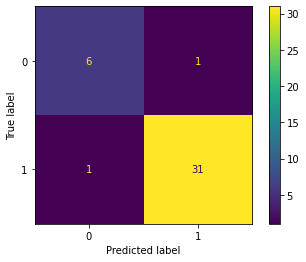

In [ ]:
#confusion matrix is used to visualize important predictive analytics like recall,spectify,accuracy,and precision.
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(KNN,x_test,y_test)
plt.show()

In [ ]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
import sklearn.metrics as sk
sk.roc_auc_score(y_pred,y_test)*100

In [ ]:
#roc curve - is a useful tool in predicting the probability of a binary outcome is the Reciever Operating
#characteristic curve or ROC curve.
plot_roc_curve(KNN,x_test,y_test)
plt.show()

# **SUMMARY**

In [ ]:
DF=pd.DataFrame()
data = [['XG BOOST',92 ], ['ADABOOST', 92], [' LogisticRegression', 87 ], ['Naïve Bayes', 71],['DECISION TREE', 84 ],['SVM', 89],['KNN', 94]]
df = pd.DataFrame(data, columns = ['Model', 'Accuracy Score'])
df


,Model,Accuracy Score
0,XG BOOST,92
1,ADABOOST,92
2,LogisticRegression,87
3,Naïve Bayes,71
4,DECISION TREE,84
5,SVM,89
6,KNN,94
